In [2]:
# uploads files

from google.colab import files
uploaded  = files.upload()


Saving titanic.csv to titanic.csv


In [3]:
!ls


sample_data  titanic.csv


In [30]:
# dataframe

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('titanic.csv')
df

,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,male,22.0,1,7.2500,0
1,1,female,38.0,1,71.2833,1
2,3,female,26.0,0,7925.0000,1
3,1,female,35.0,1,53.1000,1
4,3,male,35.0,0,8.0500,0
...,...,...,...,...,...,...
886,2,male,27.0,0,13.0000,0
887,1,female,19.0,0,30.0000,1
888,3,female,NaN,1,23.4500,0
889,1,male,26.0,0,30.0000,1


In [31]:
df.head()


,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,male,22.0,1,7.2500,0
1,1,female,38.0,1,71.2833,1
2,3,female,26.0,0,7925.0000,1
3,1,female,35.0,1,53.1000,1
4,3,male,35.0,0,8.0500,0


In [32]:
df = df.fillna(df.mean())

In [33]:
df

,Pclass,Sex,Age,SibSp,Fare,Survived
0,3,male,22.000000,1,7.2500,0
1,1,female,38.000000,1,71.2833,1
2,3,female,26.000000,0,7925.0000,1
3,1,female,35.000000,1,53.1000,1
4,3,male,35.000000,0,8.0500,0
...,...,...,...,...,...,...
886,2,male,27.000000,0,13.0000,0
887,1,female,19.000000,0,30.0000,1
888,3,female,29.699118,1,23.4500,0
889,1,male,26.000000,0,30.0000,1


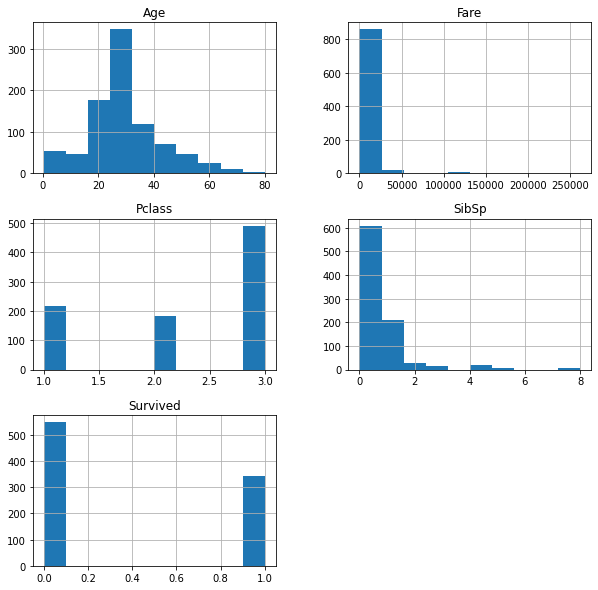

In [34]:
# histograms 
df.hist(bins=10, figsize=(10,10))
plt.show()

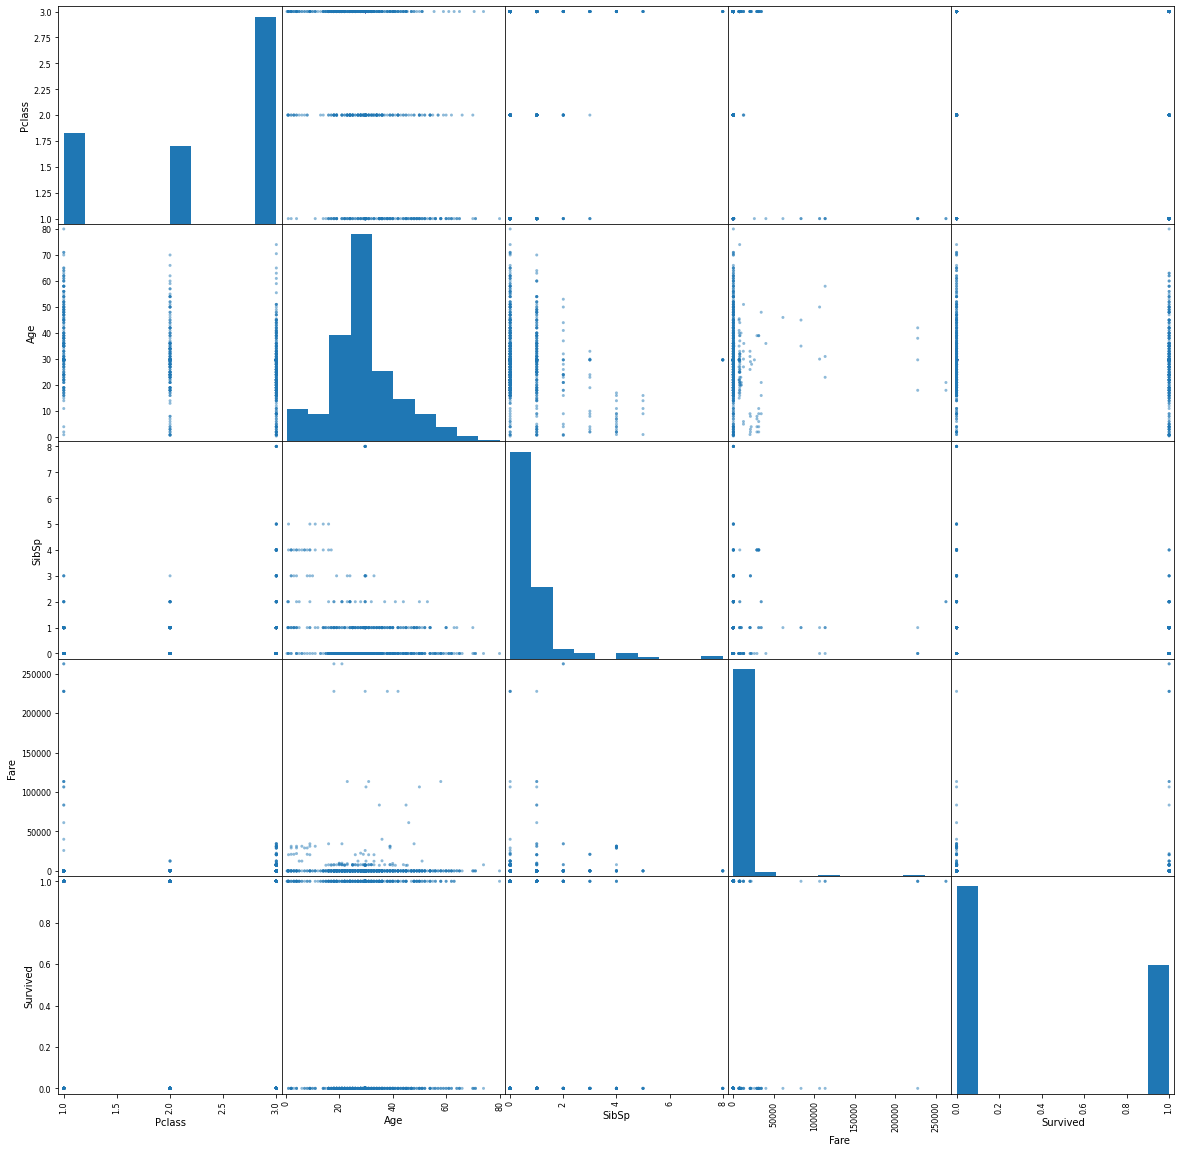

In [35]:
##

from pandas.plotting import scatter_matrix
attributes = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Survived"]
scatter_matrix(df[attributes], figsize=(20, 20))
plt.show()

In [36]:
##

y = df.pop('Survived').values
df

,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.000000,1,7.2500
1,1,female,38.000000,1,71.2833
2,3,female,26.000000,0,7925.0000
3,1,female,35.000000,1,53.1000
4,3,male,35.000000,0,8.0500
...,...,...,...,...,...
886,2,male,27.000000,0,13.0000
887,1,female,19.000000,0,30.0000
888,3,female,29.699118,1,23.4500
889,1,male,26.000000,0,30.0000


In [38]:
#


from sklearn.preprocessing import LabelEncoder, OneHotEncoder

est = LabelEncoder()
pclass = est.fit_transform(df['Pclass'].values)
df['Pclass'] = pclass

est2 = OneHotEncoder(sparse=False)
sex  = est2.fit_transform(df['Sex'].values.reshape(-1, 1))



df['sex1'] = sex[: ,0]
df['sex2'] = sex[: ,1]

df = df.drop(['Sex'], axis=1)
df

,Pclass,Age,SibSp,Fare,sex1,sex2
0,2,22.000000,1,7.2500,0.0,1.0
1,0,38.000000,1,71.2833,1.0,0.0
2,2,26.000000,0,7925.0000,1.0,0.0
3,0,35.000000,1,53.1000,1.0,0.0
4,2,35.000000,0,8.0500,0.0,1.0
...,...,...,...,...,...,...
886,1,27.000000,0,13.0000,0.0,1.0
887,0,19.000000,0,30.0000,1.0,0.0
888,2,29.699118,1,23.4500,1.0,0.0
889,0,26.000000,0,30.0000,0.0,1.0


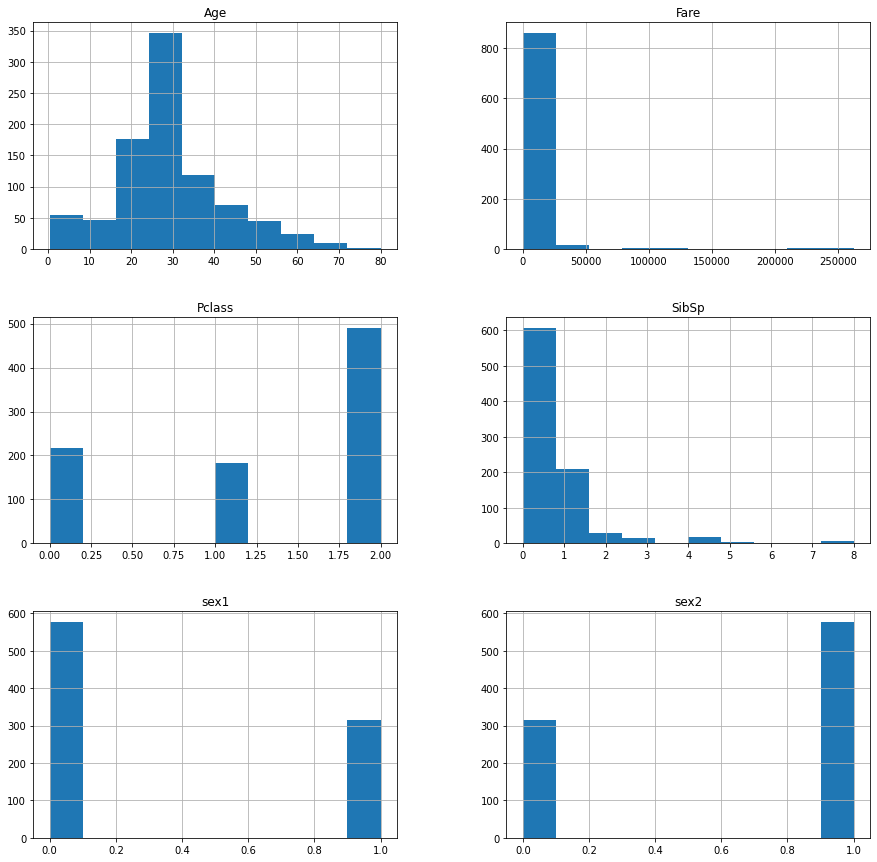

In [39]:
##

df.hist(bins=10, figsize=(15,15))
plt.show()

(623, 6) (268, 6) (623,) (268,)


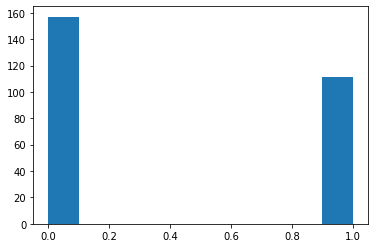

In [43]:
# treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

plt.hist(y_test)

plt.show()

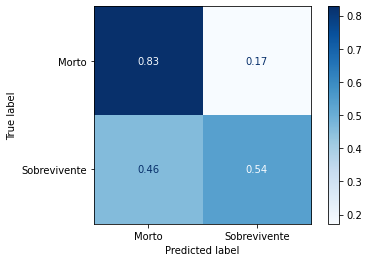

In [44]:
#classificação

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

k = 3
neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

disp = plot_confusion_matrix(neigh, X_test, y_test, 
                              display_labels=['Morto', 'Sobrevivente'],
                             cmap = plt.cm.Blues,
                             normalize = 'true'
                             )
plt.show()


In [46]:
#

y_pred = neigh.predict(X_test)
cfm = confusion_matrix(y_test, y_pred)

print('Confusion matrix:\n ', cfm)

Acc = sum(cfm.diagonal()) / len(y_test)


default_acc = sum(y_test == 0) / len(y_test)

print('kNN: ', Acc, '\n default: ',default_acc)                       

Confusion matrix:
  [[130  27]
 [ 51  60]]
kNN:  0.7089552238805971 
 default:  0.585820895522388


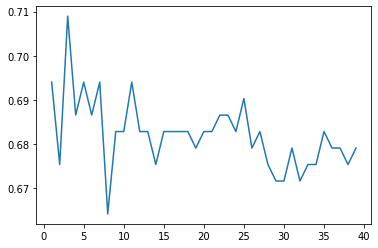

In [50]:
##
scores = []
max_k = 40
for k in range(1, max_k):
  neigh = KNeighborsClassifier(n_neighbors=k )
  neigh.fit(X_train, y_train)
  scores.append(neigh.score( X_test, y_test ))

plt.plot(range(1, max_k),scores)
plt.show()